In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms

# Data formatting

This section imports the dataset, filters down to columns relevant to the investigation and generates some useful headline statistics to inform the direction of the rest of the research.

The research conducted does not seek to analyse variations between genders or geographical bounds but seeks to study the relationship between spending at local authority level and prevalence of 

#### Import data

In [13]:
#Data input
health_df = pd.read_csv('coursework_1_data_2019.csv')
health_df.head()

,local_authority_area,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,...,2018_pop_female,total_budget,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling,region,local_authority_type
0,Barking and Dagenham,593,619,763,172684,179030,181779,187,190,230,...,103796,139000,21000,22000,18000,41000,18000,19000,London,london_borough
1,Barnet,539,594,773,340435,344062,355955,212,204,292,...,194186,220000,50000,17000,23000,74000,30000,26000,London,london_borough
2,Barnsley,360,451,527,226755,244010,257883,148,186,212,...,130828,160000,41000,45000,5000,26000,29000,14000,Yorkshire and the Humber,metropolitan_borough
3,Bath and North East Somerset,456,421,494,178625,172975,189334,157,129,156,...,98444,161000,33000,42000,19000,50000,10000,7000,South West,unitary_authority
4,Bedford,311,327,367,158185,164807,170463,138,145,156,...,87854,130000,37000,52000,17000,8000,3000,13000,East of England,unitary_authority


#### Filter for variables of interest

In [14]:
#Drop columns relating to gender data. Using regex='male' method removes 12 columns relating to both male and female breakdowns
health_df.drop(health_df.filter(regex='male').columns, axis = 1, inplace=True)

#Drop unnecessary geographical grouping columns
health_df.drop(columns=['region'], axis=1, inplace=True)
health_df.drop(columns=['local_authority_type'], axis=1, inplace=True)

#Drop '2013' columns
health_df.drop(health_df.filter(regex='2013').columns, axis = 1, inplace=True)

health_df.head()

,local_authority_area,2008_cases_total,2018_cases_total,2008_pop_total,2018_pop_total,total_budget,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling
0,Barking and Dagenham,593,763,172684,181779,139000,21000,22000,18000,41000,18000,19000
1,Barnet,539,773,340435,355955,220000,50000,17000,23000,74000,30000,26000
2,Barnsley,360,527,226755,257883,160000,41000,45000,5000,26000,29000,14000
3,Bath and North East Somerset,456,494,178625,189334,161000,33000,42000,19000,50000,10000,7000
4,Bedford,311,367,158185,170463,130000,37000,52000,17000,8000,3000,13000


In [15]:
#Remaining columns from raw dataset
list(health_df)

['local_authority_area',
 '2008_cases_total',
 '2018_cases_total',
 '2008_pop_total',
 '2018_pop_total',
 'total_budget',
 'clean_air',
 'clean_environ',
 'health_training',
 'school_awareness',
 'media_awareness',
 'sub_counselling']

#### Introduce additional columns that allow for comparison across Local Authorities

In [16]:
#Additional columns: Cases / 100k
health_df["2008_cases_per_100k"] = health_df["2008_cases_total"] / health_df["2008_pop_total"] * 100000
health_df["2018_cases_per_100k"] = health_df["2018_cases_total"] / health_df["2018_pop_total"] * 100000

In [17]:
#Additional column: Change in Cases / 100k betwen 2008 and 2018
health_df["Change_cases_per_100k_2008_2018"] = health_df["2018_cases_per_100k"] - health_df["2008_cases_per_100k"]
health_df["Reduction_cases_per_100k_2008_2018"] = health_df["Change_cases_per_100k_2008_2018"] * -1

In [18]:
#Additional column: Total budget per capita (based off 2008 population)
health_df["total_budget_per_cap"] = health_df["total_budget"] / health_df["2008_pop_total"]
health_df["clean_air_per_cap"] = health_df["clean_air"] / health_df["2008_pop_total"]
health_df["clean_environ_per_cap"] = health_df["clean_environ"] / health_df["2008_pop_total"]
health_df["health_training_per_cap"] = health_df["health_training"] / health_df["2008_pop_total"]
health_df["school_awareness_per_cap"] = health_df["school_awareness"] / health_df["2008_pop_total"]
health_df["media_awareness_per_cap"] = health_df["media_awareness"] / health_df["2008_pop_total"]
health_df["sub_counselling_per_cap"] = health_df["sub_counselling"] / health_df["2008_pop_total"]
health_df.head()

,local_authority_area,2008_cases_total,2018_cases_total,2008_pop_total,2018_pop_total,total_budget,clean_air,clean_environ,health_training,school_awareness,...,2018_cases_per_100k,Change_cases_per_100k_2008_2018,Reduction_cases_per_100k_2008_2018,total_budget_per_cap,clean_air_per_cap,clean_environ_per_cap,health_training_per_cap,school_awareness_per_cap,media_awareness_per_cap,sub_counselling_per_cap
0,Barking and Dagenham,593,763,172684,181779,139000,21000,22000,18000,41000,...,419.740454,76.338633,-76.338633,0.804939,0.121609,0.127400,0.104237,0.237428,0.104237,0.110028
1,Barnet,539,773,340435,355955,220000,50000,17000,23000,74000,...,217.162282,58.835435,-58.835435,0.646232,0.146871,0.049936,0.067561,0.217369,0.088123,0.076373
2,Barnsley,360,527,226755,257883,160000,41000,45000,5000,26000,...,204.356239,45.594580,-45.594580,0.705607,0.180812,0.198452,0.022050,0.114661,0.127891,0.061741
3,Bath and North East Somerset,456,494,178625,189334,161000,33000,42000,19000,50000,...,260.914574,5.631159,-5.631159,0.901330,0.184745,0.235129,0.106368,0.279916,0.055983,0.039188
4,Bedford,311,367,158185,170463,130000,37000,52000,17000,8000,...,215.295988,18.690747,-18.690747,0.821823,0.233903,0.328729,0.107469,0.050574,0.018965,0.082182


# Data Exploration

,Change_cases_per_100k_2008_2018,Reduction_cases_per_100k_2008_2018,total_budget_per_cap,clean_air_per_cap,clean_environ_per_cap,health_training_per_cap,school_awareness_per_cap,media_awareness_per_cap,sub_counselling_per_cap
Reduction_cases_per_100k_2008_2018,-1.0,1.0,0.144297,0.137549,-0.027461,0.089867,0.262486,-0.228038,-0.10518


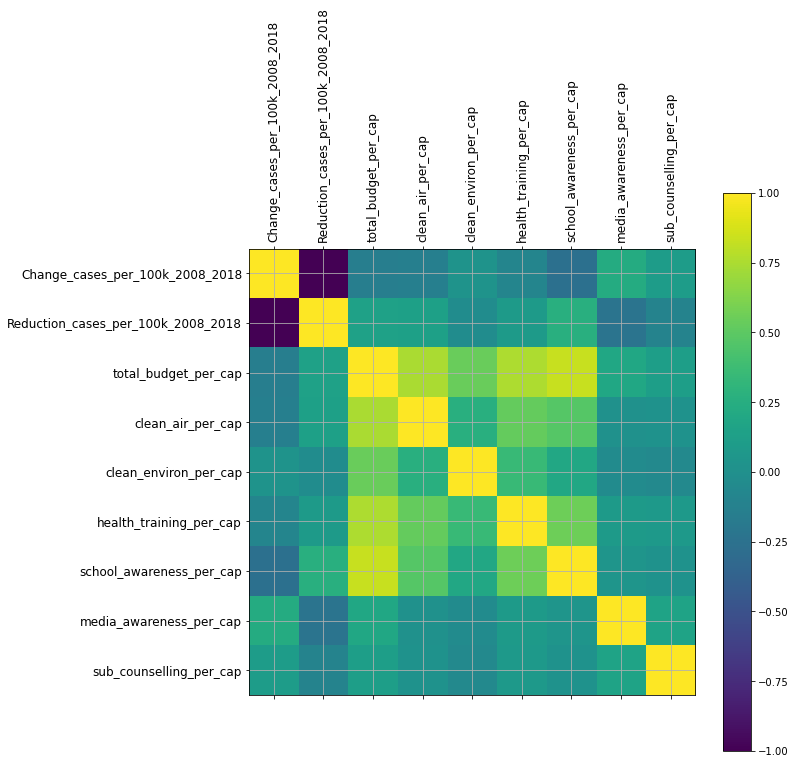

In [21]:
df = health_df
#Use columns 14 onwards for correlation matrix calculation
df = df.iloc[:,14:]

#Plot correlation matrix figure
plt.rcParams["axes.grid"] = True
f = plt.figure(figsize=(10, 10))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=12, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=12)
legend = plt.colorbar()
#legend.ax.tick_params(labelsize=12)

#Raw correlation matrix and filtered to show 
df_corr = df.corr()
df_corr = df_corr.loc[["Reduction_cases_per_100k_2008_2018"]]
df_corr

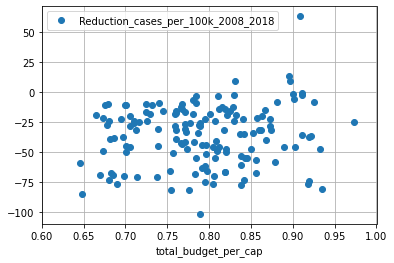

In [22]:
health_df.plot(x='total_budget_per_cap', y='Reduction_cases_per_100k_2008_2018', style='o')
plt.xlim(0.6,1)
#plt.savefig("total_budget_per_cap vs. reduction_cases_per_100k_2008_2018_LIM.png")
plt.show()

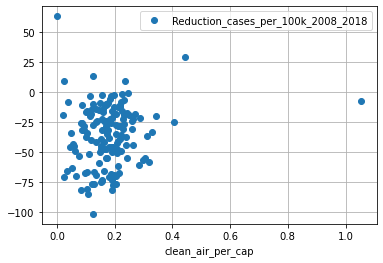

In [23]:
health_df.plot(x='clean_air_per_cap', y='Reduction_cases_per_100k_2008_2018', style='o')
plt.show()

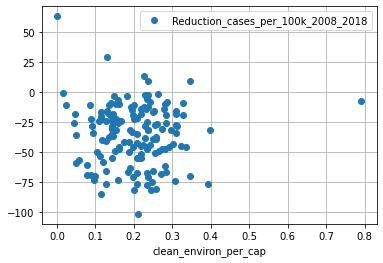

In [24]:
health_df.plot(x='clean_environ_per_cap', y='Reduction_cases_per_100k_2008_2018', style='o')
plt.show()

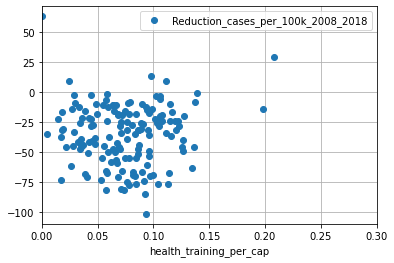

In [25]:
health_df.plot(x='health_training_per_cap', y='Reduction_cases_per_100k_2008_2018', style='o')

#Cropped view to hide extreme outliers in x
plt.xlim(0,0.3)

plt.show()

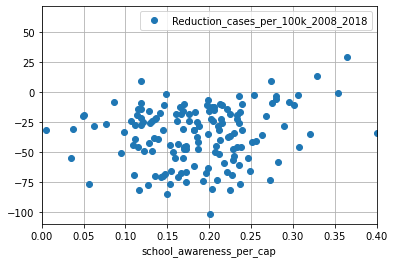

In [26]:
health_df.plot(x='school_awareness_per_cap', y='Reduction_cases_per_100k_2008_2018', style='o')

#Cropped view to hide extreme outliers in x
plt.xlim(0,0.4)

#plt.savefig("school_awareness_per_cap vs. reduction_cases_per_100k_2008_2018_LIM_VIEW.png")
plt.show()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


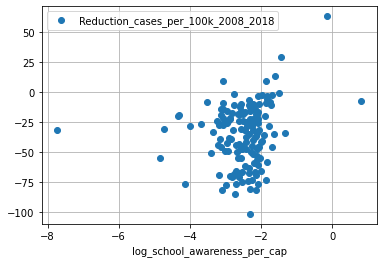

In [27]:
#Trialling a log plot, but produces no useful relationship
health_df_school_awareness_log = health_df[['Reduction_cases_per_100k_2008_2018', 'school_awareness_per_cap']]
health_df_school_awareness_log['log_school_awareness_per_cap'] = np.log2(health_df_school_awareness_log['school_awareness_per_cap'])

health_df_school_awareness_log.plot(x='log_school_awareness_per_cap', y='Reduction_cases_per_100k_2008_2018', style='o')
#plt.xlim(0,0.5)
plt.show()

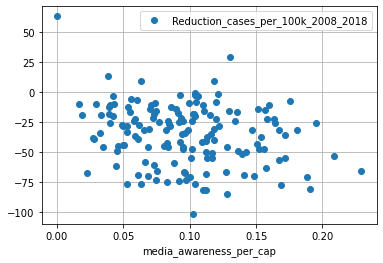

In [28]:
health_df.plot(x='media_awareness_per_cap', y='Reduction_cases_per_100k_2008_2018', style='o')
plt.show()

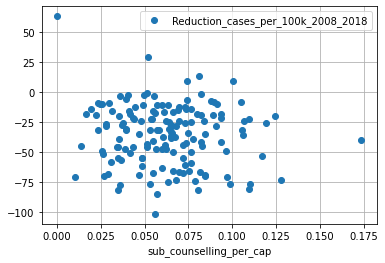

In [29]:
health_df.plot(x='sub_counselling_per_cap', y='Reduction_cases_per_100k_2008_2018', style='o')
plt.show()

### Regression Analysis of total budget per cap

                                    OLS Regression Results                                    
Dep. Variable:     Reduction_cases_per_100k_2008_2018   R-squared:                       0.021
Model:                                            OLS   Adj. R-squared:                  0.014
Method:                                 Least Squares   F-statistic:                     3.190
Date:                                Mon, 15 Nov 2021   Prob (F-statistic):             0.0761
Time:                                        16:12:50   Log-Likelihood:                -704.04
No. Observations:                                 152   AIC:                             1412.
Df Residuals:                                     150   BIC:                             1418.
Df Model:                                           1                                         
Covariance Type:                            nonrobust                                         
                           coef    std err        

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


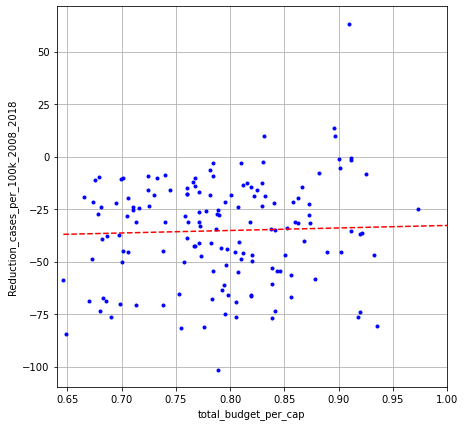

In [33]:
# Select x and y for regression analysis
x = health_df["total_budget_per_cap"]
y = health_df["Reduction_cases_per_100k_2008_2018"]

# Complete regression model
X = sms.add_constant(x)
total_budget_model = sms.OLS(y, X)
total_budget_model_fit = total_budget_model.fit()

# Summary of results
print(total_budget_model_fit.summary())

# Key values saved
# Now we store all the relevant values with "_tbm" ending to identify "total_budget_model":
gradient_tbm  = total_budget_model_fit.params[1]
intercept_tbm = total_budget_model_fit.params[0]
Rsquared_tbm  = total_budget_model_fit.rsquared
MSE_tbm       = total_budget_model_fit.mse_resid
pvalue_tbm    = total_budget_model_fit.f_pvalue

# And print them:
print("gradient  =", gradient_tbm)
print("intercept =", intercept_tbm)
print("Rsquared  =", Rsquared_tbm)
print("MSE       =", MSE_tbm)
print("pvalue    =", pvalue_tbm)

# This line creates the endpoints of the best-fit line:
x_lobf_tbm = [min(x),max(x)]
y_lobf_tbm = [x_lobf_tbm[0]*gradient_tbm + intercept_tbm,x_lobf_tbm[1]*gradient_tbm + intercept_tbm]

# Set figure size
figure_width, figure_height = 7,7

# Create and plot figure
plt.figure(figsize=(figure_width,figure_height))

#Comment out this line to get the full view.
plt.xlim(0.64,1)

plt.xlabel('total_budget_per_cap')
plt.ylabel('Reduction_cases_per_100k_2008_2018')
plt.plot(x,y,'b.',x_lobf_tbm,y_lobf_tbm,'r--')
plt.savefig("total_budget_model_LIM.png")

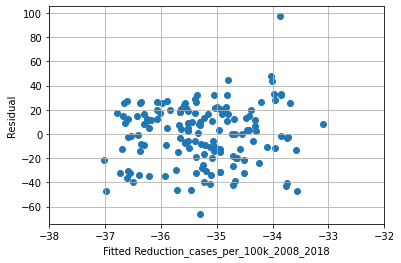

In [34]:
# plot 
plt.scatter(total_budget_model_fit.fittedvalues, total_budget_model_fit.resid)
# adding title and labels
plt.xlabel('Fitted Reduction_cases_per_100k_2008_2018')
plt.ylabel('Residual')
plt.xlim(-38,-32)
#plt.savefig("total_budget_model_RES_LIM.png")
plt.show()

### Regression Analysis of school awareness per cap

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                                    OLS Regression Results                                    
Dep. Variable:     Reduction_cases_per_100k_2008_2018   R-squared:                       0.069
Model:                                            OLS   Adj. R-squared:                  0.063
Method:                                 Least Squares   F-statistic:                     11.10
Date:                                Mon, 15 Nov 2021   Prob (F-statistic):            0.00109
Time:                                        16:14:13   Log-Likelihood:                -700.22
No. Observations:                                 152   AIC:                             1404.
Df Residuals:                                     150   BIC:                             1410.
Df Model:                                           1                                         
Covariance Type:                            nonrobust                                         
                               coef    std err    

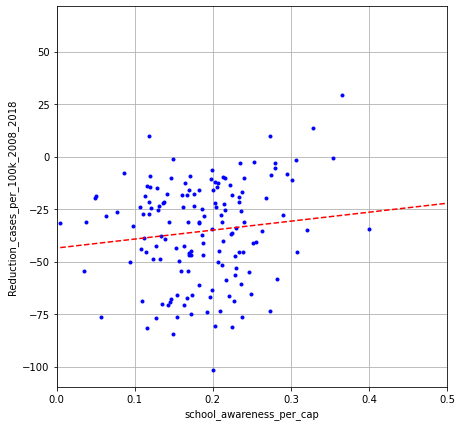

In [36]:
# Select x and y for regression analysis
x = health_df["school_awareness_per_cap"]
y = health_df["Reduction_cases_per_100k_2008_2018"]

# Complete regression model
X = sms.add_constant(x)
school_awareness_model = sms.OLS(y, X)
school_awareness_model_fit = school_awareness_model.fit()

# Summary of results
print(school_awareness_model_fit.summary())

# Key values saved
# Now we store all the relevant values with "_sam" ending to identify "school_awareness_model":
gradient_sam  = school_awareness_model_fit.params[1]
intercept_sam = school_awareness_model_fit.params[0]
Rsquared_sam  = school_awareness_model_fit.rsquared
MSE_sam       = school_awareness_model_fit.mse_resid
pvalue_sam    = school_awareness_model_fit.f_pvalue

# And print them:
print("gradient  =", gradient_sam)
print("intercept =", intercept_sam)
print("Rsquared  =", Rsquared_sam)
print("MSE       =", MSE_sam)
print("pvalue    =", pvalue_sam)

# This line creates the endpoints of the best-fit line:
x_lobf_sam = [min(x),max(x)]
y_lobf_sam = [x_lobf_sam[0]*gradient_sam + intercept_sam,x_lobf_sam[1]*gradient_sam + intercept_sam]

# Set figure size
figure_width, figure_height = 7,7

# Create and plot figure
plt.figure(figsize=(figure_width,figure_height))

# Comment out this line to get the full view.
plt.xlim(0,0.5)

plt.xlabel('school_awareness_per_cap')
plt.ylabel('Reduction_cases_per_100k_2008_2018')
plt.plot(x,y,'b.',x_lobf_sam,y_lobf_sam,'r--')
plt.savefig("school_awareness_model_LIM.png")

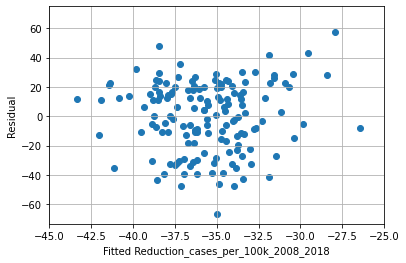

In [37]:
# plot 
plt.scatter(school_awareness_model_fit.fittedvalues, school_awareness_model_fit.resid)
# adding title and labels
plt.xlabel('Fitted Reduction_cases_per_100k_2008_2018')
plt.ylabel('Residual')
plt.xlim(-45,-25)
#plt.savefig("school_awareness_model_RES_LIM.png")
plt.show()

### Compare regression model results

In [38]:
# Create summary dataframe
reg_summary_df = pd.DataFrame(columns = ['Total_budget_per_cap','School_awareness_per_cap'])
reg_summary_df = reg_summary_df.append({'Total_budget_per_cap': Rsquared_tbm, 'School_awareness_per_cap' : Rsquared_sam}, ignore_index=True)
reg_summary_df = reg_summary_df.append({'Total_budget_per_cap': pvalue_tbm, 'School_awareness_per_cap' : pvalue_sam}, ignore_index=True)
reg_summary_df.index = ['R_squared', 'p_value']
reg_summary_df

,Total_budget_per_cap,School_awareness_per_cap
R_squared,0.020822,0.068899
p_value,0.076125,0.001087
